In [34]:
#importing libraries and function

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
import time
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")


In [35]:
#importing data from csv file

data=pd.read_csv("creditcard.csv")

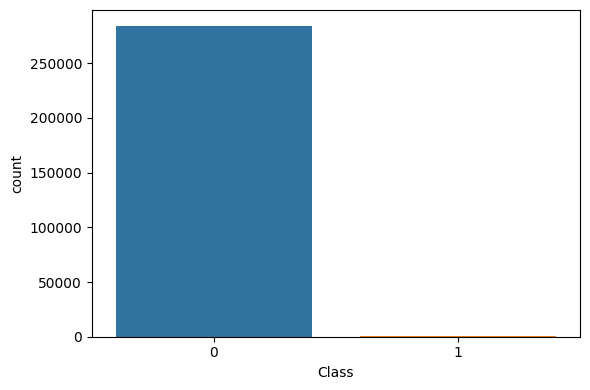

In [36]:
fig, ax = plt.subplots(figsize=(6,4))

ax = sns.countplot(x='Class', data=data)
plt.tight_layout()

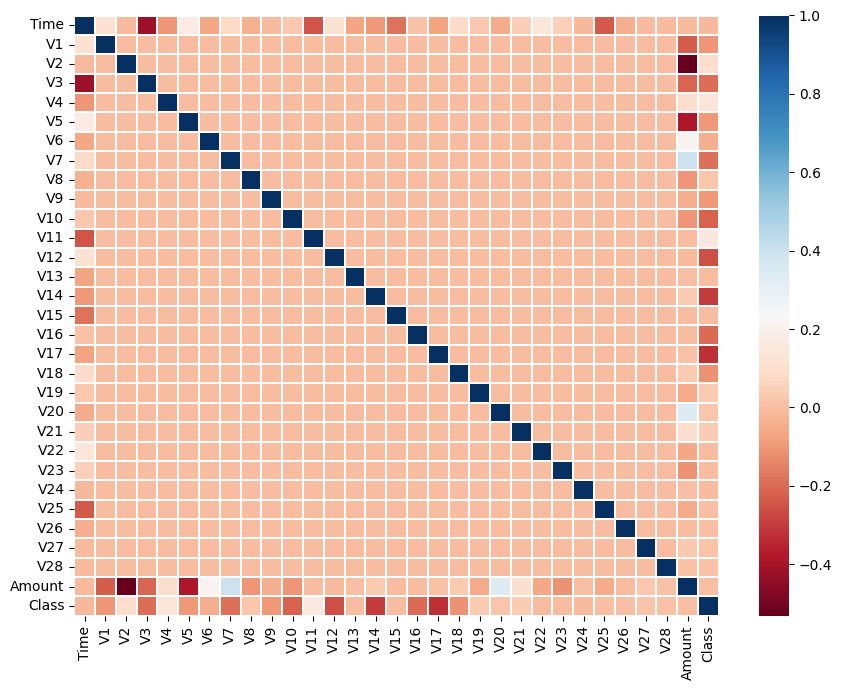

In [37]:
#plotting the heatmap 
corr = data.corr()

fig, ax = plt.subplots (figsize=(9, 7))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap="RdBu", ax=ax) 
plt.tight_layout()

In [38]:
#splitting the data according to class
fraud= data.loc[data['Class']==1]
normal= data.loc[data['Class']==0]

In [39]:
len(fraud)

492

In [40]:
len(normal)

284315

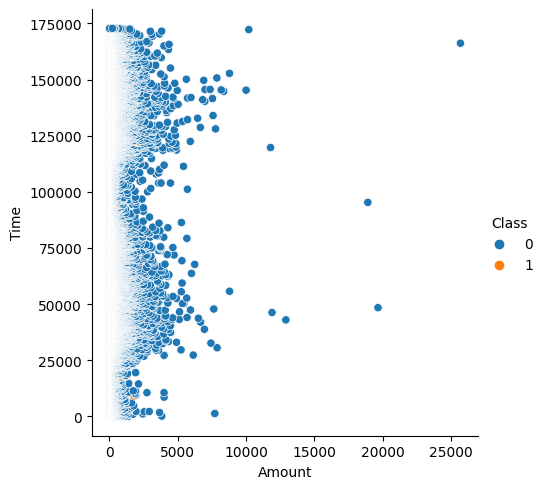

In [41]:
#plotting the data
sns.relplot(x='Amount',y='Time',hue='Class',data=data)

In [42]:
#balancing the highly unbalanced data

#undersampling
normal_sample = normal.sample(n=492)

#oversampling
osm = SMOTE(random_state = 42)
X= data.drop(columns='Class',axis=1)
Y= data['Class']
X_o, Y_o = osm.fit_resample(X, Y)
len(X_o)



568630

In [43]:

new_data = pd.concat([normal_sample,fraud],axis=0)


In [44]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

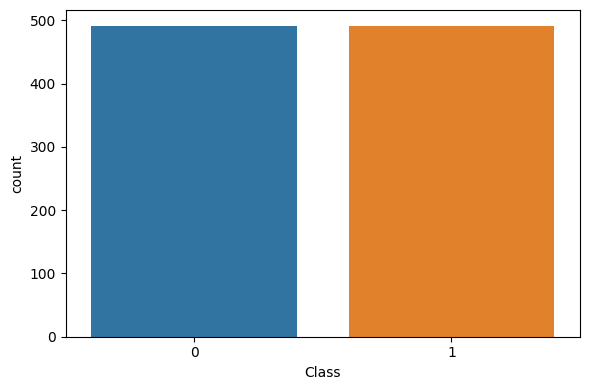

In [45]:
fig, ax = plt.subplots(figsize=(6,4))

ax = sns.countplot(x='Class', data=new_data)
plt.tight_layout()

In [46]:
X= new_data.drop(columns='Class',axis=1)
Y= new_data['Class']


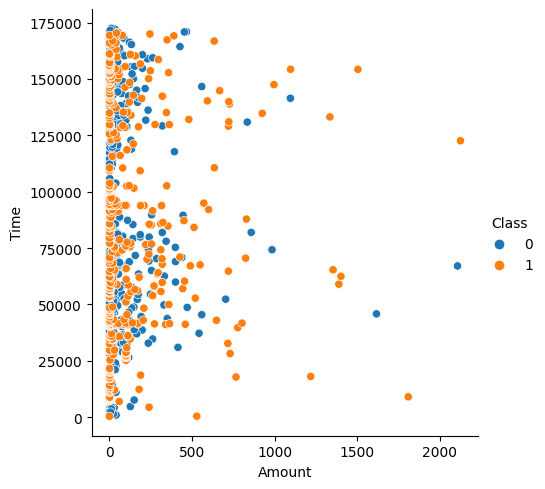

In [47]:
#plotting the balanced data
sns.relplot(x='Amount',y='Time',hue='Class',data=new_data)

In [48]:
#splitting the undersampled data for test and train purpose
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state = 2)
                                               
#spitting the oversampled data for test and train purpose 
X_o_train,X_o_test,Y_o_train,Y_o_test=train_test_split(X_o,Y_o,test_size=0.2,stratify=Y_o,random_state=2)

In [49]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


In [50]:
model = LogisticRegression()
model1= LogisticRegression()


In [51]:
model2=RandomForestClassifier()
model3=RandomForestClassifier()

In [52]:
#training the model using train data

model.fit(X_train,Y_train)
model1.fit(X_o_train,Y_o_train)


LogisticRegression()

In [53]:
model2.fit(X_train,Y_train)


RandomForestClassifier()

In [ ]:
model3.fit(X_o_train,Y_o_train)

In [54]:
X_train_prediction= model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
X_o_train_prediction1=model1.predict(X_o_train)
training_data_accuracy1=accuracy_score(X_o_train_prediction1,Y_o_train)

In [55]:
print("Training data accuracy of logistic regression (under-sampling): ")
print(training_data_accuracy)
print("Training data accuracy of logistic regression (over-sampling): ")
print(training_data_accuracy1)

Training data accuracy of logistic regression (under-sampling): 
0.9199491740787802
Training data accuracy of logistic regression (over-sampling): 
0.9737307212071118


In [56]:
X_test_prediction= model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
X_o_test_prediction=model1.predict(X_o_test)
test_data_accuracy1=accuracy_score(X_o_test_prediction,Y_o_test)

In [57]:
print("Test data accuracy of logistic regression (under-sampling): ")
print(test_data_accuracy)
print("Test data accuracy of logistic regression (over-sampling): ")
print(test_data_accuracy1)

Test data accuracy of logistic regression (under-sampling): 
0.9035532994923858
Test data accuracy of logistic regression (over-sampling): 
0.973787876123314


In [58]:
X_train_prediction= model2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)


In [ ]:
X_o_train_prediction1=model3.predict(X_o_train)
training_data_accuracy1=accuracy_score(X_o_train_prediction1,Y_o_train)

In [60]:
print("Training data accuracy of random forest classifier (under-sampling): ")
print(training_data_accuracy)
print("Training data accuracy of random forest classifier (over-sampling): ")
print(training_data_accuracy1)

Training data accuracy of random forest classifier (under-sampling): 
1.0
Training data accuracy of random forest classifier (over-sampling): 
1.0


In [61]:
X_test_prediction= model2.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)


In [ ]:
X_o_test_prediction=model3.predict(X_o_test)
test_data_accuracy1=accuracy_score(X_o_test_prediction,Y_o_test)

In [62]:
print("Test data accuracy of random forest classifier (under-sampling): ")
print(test_data_accuracy)
print("Test data accuracy of random forest classifier (over-sampling): ")
print(test_data_accuracy1)

Test data accuracy of random forest classifier (under-sampling): 
0.934010152284264
Test data accuracy of random forest classifier (over-sampling): 
0.9278231229551485
